In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
import tensorflow as tf

In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [4]:
path = './EURUSD_D1.json'

with open (path) as f:
    df = json.load(f)

In [5]:
columns = ['time', 'open','high', 'low', 'close', 'volume']
df = pd.DataFrame(df)[columns]
df.head()

,time,open,high,low,close,volume
0,3682080,1.31908,1.32176,1.31650,1.32120,1995282
1,3683520,1.32137,1.32951,1.32101,1.32724,2009661
2,3684960,1.32702,1.32903,1.31461,1.31690,2016603
3,3686400,1.31689,1.31783,1.30704,1.30860,2007990
4,3687840,1.30866,1.31029,1.29804,1.29995,1916561


In [ ]:
# data creation and scalling
scaler = MinMaxScaler(feature_range = (0,1))

In [28]:
price= 'low'
data = scaler.fit_transform(df[[price]])

CREATING THE FUTURES DATA

In [29]:
"""THIS WILL USE THE LAST 70 OBSERVATIONS ARRANGED INTO AN ARRAY OF 10 ROWS 
INCLUSIVE OF ARRAY FOR THE LAST FIVE OBSERVATIONS TO PREDICT THE NEXT FIVE RESULTS"""

f_array = data[-70:]

f_array2 = []
for i in range(60, len(f_array)):
    f_array2.append(f_array[i-60:i, : ])

In [30]:
f_array2 = np.array(f_array2).reshape(10,60,1)

f_array2.shape, f_array.shape

((10, 60, 1), (70, 1))

CREATING THE COMBINED TRAINING AND TEST DATA

In [31]:
"""THE TARGET WOULD RANGE FROM THE 65TH OBSERVATION TO THE LAST,
THE TRAINING AND TEST DATA WOULD RANGE FROM THE FIRST OBSERVATION UP TO THE LAST 5 OBSERVATIONS, 
HOWEVER, THE ARRAY WOULD BE FROM THE 60TH UP TO THE LAST 5 """

c_target = data[65:]
c_t_t = []
for i in range(60, len(data)-5):
    c_t_t.append(data[i-60:i, : ])
    
# define lenght of train set(90%)
train_len = int(np.ceil(len(data) *0.9))

# define the train and test set of combined test and train (c_t_t)
# create an array too

x_train, x_test = np.array(c_t_t[ :train_len]), np.array(c_t_t[train_len:])
y_train, y_test = np.array(c_target[:train_len]), np.array(c_target[train_len:])


In [32]:
x_train.reshape(x_train.shape[0], x_train.shape[1], 1), x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_train.shape, x_test.shape

((3798, 60, 1), (356, 60, 1))

BUILD AND COMPILE THE MODEL

In [33]:
# model = Sequential()
# model.add(LSTM(55, return_sequences = True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(55, return_sequences = False))
# model.add(Dense(30))
# model.add(Dense(1))

model = Sequential()
model.add(LSTM(25, return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences = False))
model.add(Dense(12))
model.add(Dense(1))

In [34]:
#compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
model.fit(x_train, y_train, batch_size = 150, epochs = 4)

Epoch 1/4
3798/3798 [==============================] - 166s 44ms/sample - loss: 0.0588
Epoch 2/4
3798/3798 [==============================] - 26s 7ms/sample - loss: 0.0076
Epoch 3/4
3798/3798 [==============================] - 21s 5ms/sample - loss: 0.0025
Epoch 4/4
3798/3798 [==============================] - 22s 6ms/sample - loss: 0.0019


     PREDICTIONS

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

FORCASTING

In [ ]:
""" 'f' is forecast """

f_train, f_target = np.array(c_t_t).reshape(len(c_t_t), 60, 1), np.array(c_target)

In [ ]:
model2 = Sequential()
model2.add(LSTM(25, return_sequences = True, input_shape= (x_train.shape[1], 1)))
model2.add(LSTM(25, return_sequences = False))
model2.add(Dense(12))
model2.add(Dense(1))

In [ ]:
#compile model
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model2.fit(f_train, f_target, batch_size = 150, epochs = 4)

In [19]:
# forecast = model2.predict(f_array2)
# forecast = scaler.inverse_transform(forecast)

In [ ]:
forecastlow = model2.predict(f_array2)
forecastlow = scaler.inverse_transform(forecastlow)

                    GRAPHINGS

In [26]:
len(predictions) == len(y_test)

True

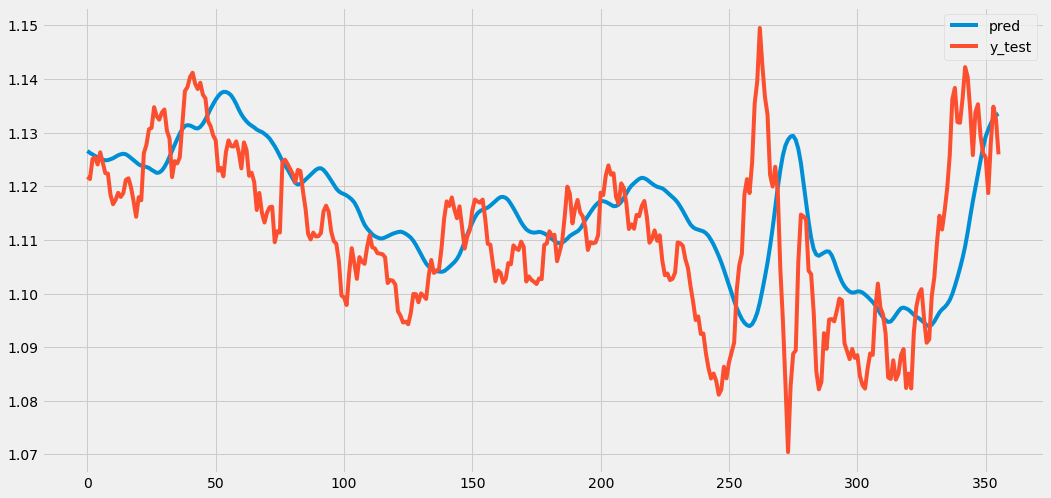

In [22]:
plt.figure(figsize=(16,8))
plt.plot(list(range(len(predictions))), predictions)
plt.plot(list(range(len(y_test))), scaler.inverse_transform(y_test))
plt.legend(['pred', 'y_test'])
plt.show()

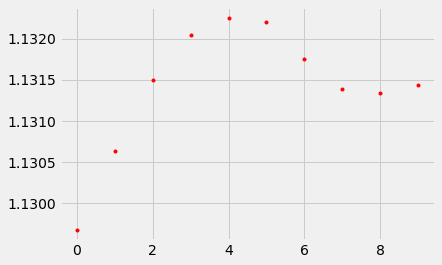

In [25]:
plt.plot(list(range(len(forecast))), forecast, '.', color = 'r')
plt.plot(list(range(len(forecast))), forecast, '.', color = 'k')
plt.show()